In [1]:
import pandas as pd
import numpy as np
import os
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
df_prods = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'))
df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders.csv'))

In [2]:
df_ords

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [3]:
#Count the unique values in the "order_dow" column
df_ords['order_dow'].value_counts()

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

In [4]:
df_prods

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3
...,...,...,...,...,...
49688,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,5.3
49689,49685,En Croute Roast Hazelnut Cranberry,42,1,3.1
49690,49686,Artisan Baguette,112,3,7.8
49691,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,4.7


# 1/6/23 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

## Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders. 

In [5]:
df_ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0


In [6]:
df_ords_prods_merge['product_name'].value_counts()

Banana                                     472565
Bag of Organic Bananas                     379450
Organic Strawberries                       264683
Organic Baby Spinach                       241921
Organic Hass Avocado                       213584
                                            ...  
Kefir Raspberry                                 1
Hot Chili with Beans                            1
Spinach Cheese Rice Palak Paneer Dinner         1
Coconut Bliss Pineapple Coconut                 1
Hot Oatmeal Multigrain Raisin                   1
Name: product_name, Length: 49661, dtype: int64

### Bananas, bag of organic bananas, organic strawberries, organic baby spinach, and organic hass avocados are the most popular products. Top five products with the highest frequencies. 

In [7]:
df_ords_prods_merge['product_name'].value_counts().head(20)

Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Name: product_name, dtype: int64

### Top 20 most frequently purchased products.

In [9]:
df_ords_prods_merge['user_id'].value_counts()

201268    3704
129928    3637
164055    3061
186704    2936
176478    2921
          ... 
188345       3
70320        3
203875       2
124615       2
91567        1
Name: user_id, Length: 206209, dtype: int64

### User_id 201268 has purchased items through instacart 3704 times. Only one customer (user_id 91567) purchased once through Instacart. All other customers returned at least 2 times. 

In [13]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

In [26]:
df_ords_prods_merge[df_ords_prods_merge['user_id']==129928]['order_dow'].value_counts()

11    728
13    591
10    468
15    373
12    361
16    260
9     159
23    137
17    134
14    128
19    112
8      74
20     70
22     42
Name: order_hour_of_day, dtype: int64

### User_id 129928 (second user to order the most through Instacart): top orders include 100% raw coconut water, 100% raw coconut water with fair trade coffee, 100% pure apple juice, total with strawberry yogurt, and guava guayasa zero. Orders the most on Sundays, followed by Thursday, Monday, Wednesday, Tuesday, Friday, and Saturday. Orders the most at 11am, 1pm, 10am, 3pm, and 12 noon. 

### User_id 91567 only ordered organic iceberg lettuce once, on Monday at 2pm (1400hours). I think at least one day is missing for this user beceause it says "order_number 2" and "2 days_since_prior_order" 

### User_id 201268: Most ordered item are organic lacinato (dinosaur) kale, sparkling water grapefruit, sparkling lemon water, uncured genoa salami, and feta cheese crumbles.

In [20]:
df_ords_prods_merge[df_ords_prods_merge['user_id']==201268]['order_dow'].value_counts()

3    1147
2     638
4     550
1     544
0     456
5     335
6      34
Name: order_dow, dtype: int64

### User_id 201268: Did majority of orders on day of the week 3 (Tuesday), followed by Monday, Wednesday, Sunday, Friday, Saturday (least orders). 

In [41]:
df_ords_prods_merge[['user_id', 'prices']].cumsum()

,user_id,prices
0,1,9.000000e+00
1,2,1.800000e+01
2,3,2.700000e+01
3,4,3.600000e+01
4,5,4.500000e+01
...,...,...
32404854,3335665569090,3.882175e+08
32404855,3335665771647,3.882175e+08
32404856,3335665975083,3.882175e+08
32404857,3335666178519,3.882175e+08


In [42]:
df_ords_prods_merge[df_ords_prods_merge['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0
5,3367565,1,prior,6,2,7,19.0,196,1,1,both,Soda,77,7,9.0
6,550135,1,prior,7,1,9,20.0,196,1,1,both,Soda,77,7,9.0
7,3108588,1,prior,8,1,14,14.0,196,2,1,both,Soda,77,7,9.0
8,2295261,1,prior,9,1,16,0.0,196,4,1,both,Soda,77,7,9.0
9,2550362,1,prior,10,4,8,30.0,196,1,1,both,Soda,77,7,9.0


In [45]:
#Show grand total of "prices" variable 
print(df_ords_prods_merge['prices'].sum())    

388217522.6000008


In [48]:
#Show sum of what each user spent 
df_ords_prods_merge[['user_id','prices']].groupby('user_id').sum()  

,prices
user_id,
1,375.7
2,1465.6
3,721.4
4,147.7
5,340.0
...,...
206205,285.1
206206,2179.3
206207,1630.9


# 1/11/23 Import Libraries and datasets

In [1]:
import pandas as pd
import numpy as np 
import os 

path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_new_columns.pkl'))

## Change data types for: 
### Order_id and order_dow

In [2]:
df_ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders


In [5]:
#Order_dow data type to string
df_ords_prods_merged['order_dow'] = df_ords_prods_merged['order_dow'].astype('str')

In [6]:
#Order_id data type to string
df_ords_prods_merged['order_id'] = df_ords_prods_merged['order_id'].astype('str')

In [7]:
df_ords_prods_merged['order_id'].dtype

dtype('O')

## Rename user_id to customer_id

In [3]:
df_ords_prods_merged.rename(columns = {'user_id': 'customer_id'}, inplace = True)

In [4]:
df_ords_prods_merged.head()

,order_id,customer_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders


## Drop eval_set column 

In [8]:
df_ords_prods_merged = df_ords_prods_merged.drop(columns = ['eval_set'])

In [9]:
df_ords_prods_merged.head()

,order_id,customer_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day
0,2539329,1,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders


# Export into the pickle file to replace it 

In [10]:
df_ords_prods_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_new_columns.pkl'))

# Import customers data set

In [11]:
df_customer = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [13]:
df_customer.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [14]:
#Eventually will combine with orders or products datasets? 

# 1/19/2023

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import dataset
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merged.pkl'))

In [14]:
cust_ords_prods[['State','prices']].groupby('State').sum().sort_values(by=['prices'])

,prices
State,
Alaska,6147697.2
Iowa,6410070.1
Wyoming,6497786.4
Massachusetts,6518811.4
New York,6532176.9
Connecticut,6594796.4
Texas,6622032.7
North Dakota,6622785.2
Montana,6629096.5


### The states that have customers that spent the most money (sum of prices in each state): South Dakota, Alabama, Kansas, New Hampshire, and Rhode Island. 

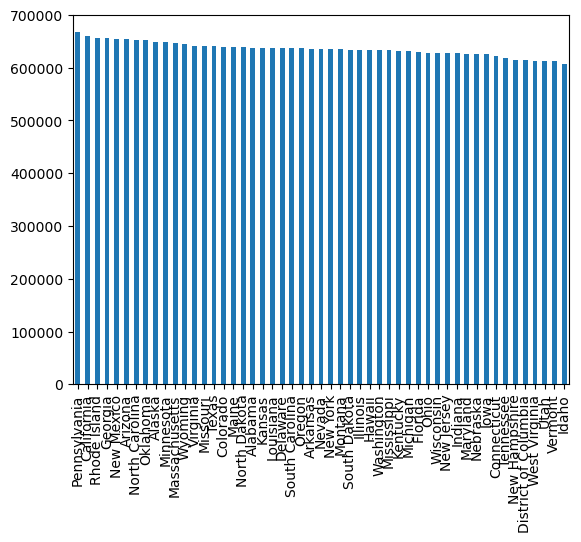

In [9]:
#Bar chart for number of orders in each state
bar = cust_ords_prods['State'].value_counts().plot.bar()

In [22]:
#Export 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','bar_state_orders.png'))

## Pennsylvania, California, Rhode Island, Georgia, and New Mexico are the top 5 states with the most orders. 

In [15]:
#Random sample to look at prices and states
np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods)) <= 0.7

In [16]:
big = cust_ords_prods[dev]
small = cust_ords_prods[~dev]

In [17]:
cust_ords_prods.shape

(32404859, 34)

In [18]:
len(big) + len(small)

32404859

In [19]:
df_2 = small[['State','prices']]

Text(0.5, 0.98, 'Prices by State')

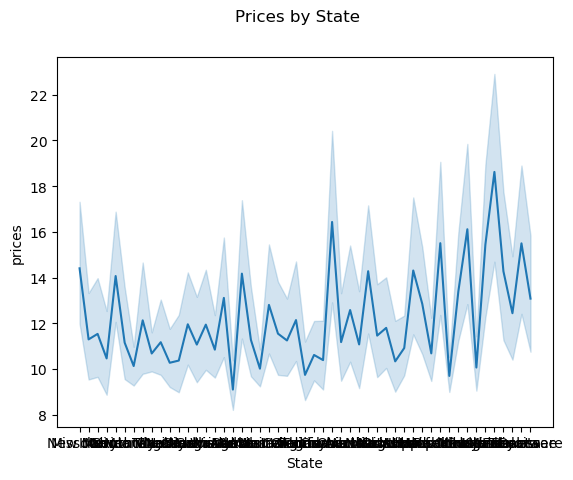

In [21]:
line = sns.lineplot(data = df_2, x='State',y='prices')
line.figure.suptitle('Prices by State')

In [4]:
#Import old datasets
orders = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders.csv'))

In [5]:
products = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'))

In [7]:
ords_prods_prior = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'order_products_prior.csv'))

In [8]:
ords_prods_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_combined.pkl'))

In [9]:
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

In [10]:
#Check shapes 
orders.shape

(3421083, 7)

In [11]:
orders_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'order_full_clean.csv'))

In [12]:
orders_clean.shape

(3421083, 8)

In [13]:
ords_prods_prior.shape

(32434489, 4)

In [14]:
products.shape

(49693, 5)

In [15]:
products_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_full_clean.csv'))

In [16]:
products_clean.shape

(49672, 6)

In [17]:
cust_ords_prods.shape

(32404859, 34)

In [18]:
customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [20]:
ords_prods_combined.shape

(32434489, 11)

In [21]:
ords_prods_merged.shape

(32404859, 15)

In [22]:
cust_ords_prods.head()

,customer_id,First Name,Last Name,Gender,State,Age,date_joined,n_dependents,fam_status,income,...,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,order_freq_flag,Check
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [12]:
#Import ord_wrangle
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
ord_wrangle = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_wrangled.csv'))

In [13]:
#Missing values in ords_prods_merge
ord_wrangle.isnull().sum()

Unnamed: 0                     0
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [14]:
#Create a crosstab to view missing values
crosstab = pd.crosstab(ord_wrangle['days_since_prior_order'], ord_wrangle['order_number'], dropna = False) 

In [15]:
#Copy to clipboard
crosstab.to_clipboard()

In [16]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,2899,2915,2964,2634,2443,2236,2101,1972,1782,...,156,154,125,151,151,153,120,144,134,137
1.0,0,4822,4613,4690,4423,4047,4000,3744,3503,3358,...,397,396,373,359,366,330,356,360,339,321
2.0,0,6203,6209,6231,5789,5679,5274,5090,4914,4705,...,416,405,407,389,359,351,359,346,318,329
3.0,0,7411,7577,7414,7097,6770,6424,6078,5750,5663,...,345,287,330,294,291,292,254,221,240,223
4.0,0,8415,8476,8469,8029,7608,7092,6735,6534,6395,...,221,238,225,191,193,185,183,170,170,153
5.0,0,9216,9329,9220,8600,8228,7703,7270,6828,6563,...,142,128,105,119,119,120,100,95,82,81
6.0,0,11419,11701,11601,10771,10054,9521,8842,8527,7727,...,77,91,86,82,67,59,58,50,58,44
7.0,0,16788,16609,16341,15135,13834,13268,12452,11612,10980,...,60,56,48,56,36,37,37,41,32,35
8.0,0,10422,10304,10148,9378,8738,8068,7594,6894,6511,...,29,22,24,26,23,30,18,16,12,13


# Key question 1: busiest days and hours

In [1]:
import pandas as pd
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 

path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'max_orders_over_5_NEW.pkl'))

Text(0.5, 1.0, 'Number of Orders per Hour')

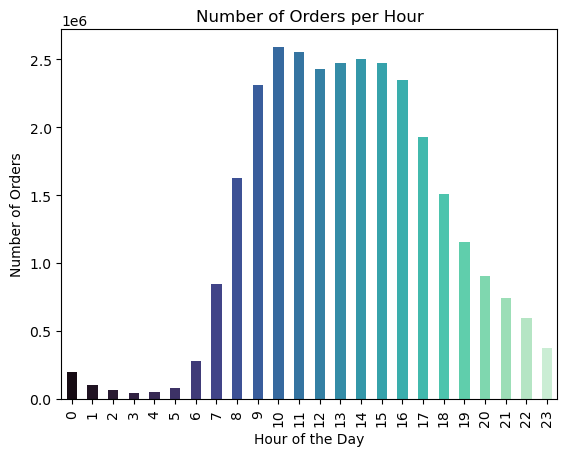

In [16]:
palette = sns.color_palette('mako', 24)
bar_hours = df['order_hour_of_day'].value_counts().sort_index().plot.bar(color = palette)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Hour")

In [17]:
#Export bar chart 
bar_hours.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_orders_per_hour.png'))

Text(0.5, 1.0, 'Number of Orders per Day')

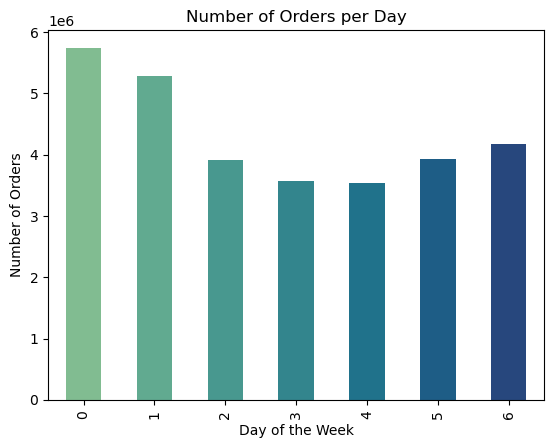

In [18]:
palette = sns.color_palette('crest', 7)
bar_days = df['order_dow'].value_counts().sort_index().plot.bar(color = palette)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Day")

In [19]:
#Export bar chart 
bar_days.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_orders_per_hour.png'))

In [22]:
df['order_hour_of_day'].value_counts()

10    2589249
11    2548678
14    2500380
13    2470467
15    2467906
12    2429704
16    2346028
9     2312895
17    1925351
8     1625397
18    1506081
19    1158192
20     906272
7      846435
21     744677
22     592916
23     374187
6      276105
0      201947
1      106003
5       82240
2       63750
4       49444
3       47120
Name: order_hour_of_day, dtype: int64

# Key question 2: times of day with most money spent

In [39]:
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'max_orders_over_5_NEW.pkl'))

In [40]:
np.random.rand(10)
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [41]:
big = df[dev] #stores true values (70%)
small = df[~dev] #stores false values (30%)

In [42]:
len(big) + len(small)

30171424

In [43]:
df.shape

(30171424, 34)

In [37]:
df_2 = small[['order_dow', 'prices']]

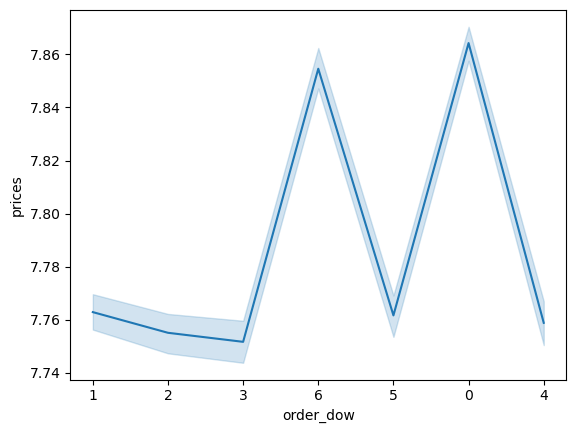

In [38]:
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')